*  Metaquestion: Should I buy plane ticket or not to Fourt Lauderdale?
*  Question to answer: Will the high temperature in Fort Lauderdale be \
   above 85 degrees Fahrenheit three days from now?

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Read in weather data

In [2]:
weather_filename = 'ft-lauderdale-beach-1952-2017.csv'
weather_file = open(weather_filename)
weather_data = weather_file.read()
weather_file.close()

print(len(weather_data))
print(weather_data[:200])

1308834
COOPID, YEAR, MONTH, DAY, PRECIPITATION, MAX TEMP, MIN TEMP, MEAN TEMP
83168,1952,1,1,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,2,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,3,-9


In [3]:
# Break the weather records into lines
lines = weather_data.split('\n')
print(len(lines))
for i in range(5):
    print(lines[:i])

24154
[]
['COOPID, YEAR, MONTH, DAY, PRECIPITATION, MAX TEMP, MIN TEMP, MEAN TEMP']
['COOPID, YEAR, MONTH, DAY, PRECIPITATION, MAX TEMP, MIN TEMP, MEAN TEMP', '83168,1952,1,1,-99.99000,-99.90000,-99.90000, -99.90000']
['COOPID, YEAR, MONTH, DAY, PRECIPITATION, MAX TEMP, MIN TEMP, MEAN TEMP', '83168,1952,1,1,-99.99000,-99.90000,-99.90000, -99.90000', '83168,1952,1,2,-99.99000,-99.90000,-99.90000, -99.90000']
['COOPID, YEAR, MONTH, DAY, PRECIPITATION, MAX TEMP, MIN TEMP, MEAN TEMP', '83168,1952,1,1,-99.99000,-99.90000,-99.90000, -99.90000', '83168,1952,1,2,-99.99000,-99.90000,-99.90000, -99.90000', '83168,1952,1,3,-99.99000,-99.90000,-99.90000, -99.90000']


In [4]:
# Separating the data into labels and values
labels = lines[0]
values = lines[1:]
n_values = len(values)

print(labels)
for i in range(10):
    print(values[i])

COOPID, YEAR, MONTH, DAY, PRECIPITATION, MAX TEMP, MIN TEMP, MEAN TEMP
83168,1952,1,1,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,2,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,3,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,4,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,5,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,6,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,7,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,8,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,9,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,10,-99.99000,-99.90000,-99.90000, -99.90000


Deciding, at this stage, to work with timestamp and \
maximum temperature for our use case. \
Break the list of comma-separated value strings \
and append into lists of values.

In [5]:
year = [];      j_year = 1
month = [];     j_month = 2
day = [];       j_day = 3
max_temp = [];  j_max_temp = 5

for i_row in range(n_values):
    row_split_values = values[i_row].split(',')
    # print(split_values)
    if len(row_split_values) >= j_max_temp:
        year.append(int(row_split_values[j_year]))
        month.append(int(row_split_values[j_month]))
        day.append(int(row_split_values[j_day]))
        max_temp.append(float(row_split_values[j_max_temp]))

for i_day in range(5):
    print(max_temp[i_day])

-99.9
-99.9
-99.9
-99.9
-99.9


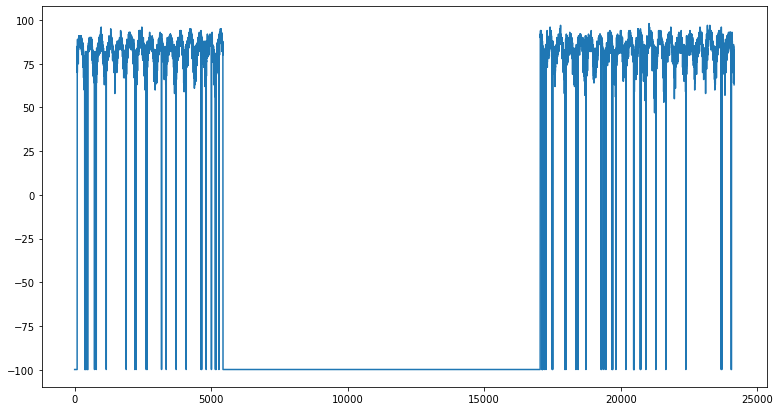

In [6]:
plt.figure(figsize=(13,7))
plt.plot(max_temp)
plt.show()

Isolating the recent data chunk, choosing to neglect the old chunk of \
temperature data and make the assumtion that the recent data have better \
predictive power for our use case, thus answer the question. \
Inserting data into a numerical python array is convinuent at this stage.

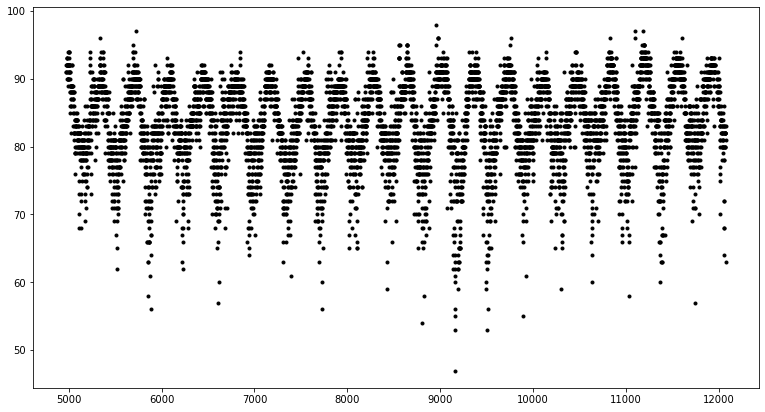

In [7]:
i_mid = len(max_temp) // 2
temps = np.array(max_temp[i_mid:])
year = np.array(year[i_mid:])
month = np.array(month[i_mid:])
day = np.array(day[i_mid:])
temps[np.where(temps == -99.9)] = np.nan

plt.figure(figsize=(13,7))
plt.plot(temps, color='black', marker='.', linestyle='none')
plt.show()

Remove all the nans. \
Trim both ends and fill nans in the middle \
Find the first non-nan \
print(np.where(np.isnan(temps))[0]) \
print(np.where(np.logical_not(np.isnan(temps)))[0])

In [8]:
i_start = np.where(np.logical_not(np.isnan(temps)))[0][0]
temps = temps[i_start:]
year = year[i_start:]
month = month[i_start:]
day = day[i_start:]
print(np.where(np.isnan(temps))[0])
# Exploring however there is a systematic leftout of temperature data
i_nans = np.where(np.isnan(temps))[0]
print(np.diff(i_nans))

[  62   69   73   83   91  157  212  441  442  443  456  457  905  944
 1310 1383 1387 1676 2229 2230 2231 2232 2235 2236 2252 2253 2254 2255
 2328 2329 2408 2630 2646 2647 2648 2649 2650 2651 2652 2653 2654 2655
 2656 2657 2658 2659 2774 3140 3423 3424 3429 3439 3440 3444 3669 3677
 3678 3680 3681 3872 4238 4604 5336 6630 6631 6652 6988 6989 6990 6991
 6992 6993 6994 6995 6996 6997 6998 6999 7000 7001 7002 7003 7004 7005
 7006 7007]
[   7    4   10    8   66   55  229    1    1   13    1  448   39  366
   73    4  289  553    1    1    1    3    1   16    1    1    1   73
    1   79  222   16    1    1    1    1    1    1    1    1    1    1
    1    1    1  115  366  283    1    5   10    1    4  225    8    1
    2    1  191  366  366  732 1294    1   21  336    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1]


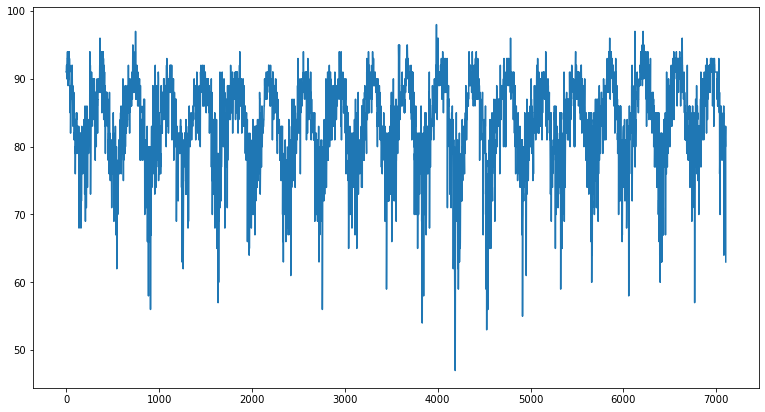

In [9]:
# Replace all nans with the most recent non-nan,
# as the method for handling missing temperature data
# noting that this could have been done in a couple of diffrent ways
for i in range(temps.size):
    if np.isnan(temps[i]):
        temps[i] = temps[i-1]

plt.figure(figsize=(13,7))
plt.plot(temps)
plt.show()

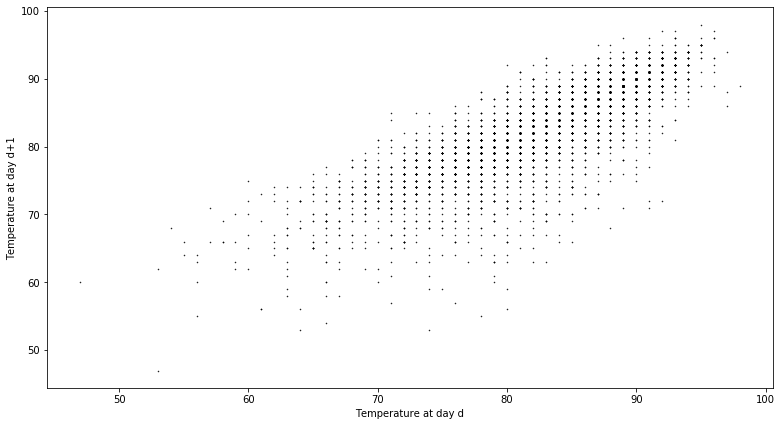

In [10]:
# We can now regard the dataset cleaned up
# Determine whether the previous day's temperature
# is related to that of the following day. Lets check
# by plotting temperature against temperature shifted one day
#    leavs last  leaves first
plt.figure(figsize=(13,7))
plt.plot(temps[:-1], temps[1:], color='black', marker='.', markersize=1, linestyle='none')
plt.xlabel("Temperature at day d")
plt.ylabel("Temperature at day d+1")
plt.show()

In [11]:
# Show the relationship between two variables.
# adding some jitter (random noise) to pertubate
# potentially on-top stacked datapoints

def jscatter(x,y,std=.5,xlabel="x values",ylabel="y values", title="Chart"):
    """
    x,y -- array-like objects
    Make a scatter plot with jitter.
    jscatter(x,y,std=.5,xlabel='x',ylabel='y')
    """
    x_jitter = x + np.random.normal(size=x.size, scale=std)
    y_jitter = y + np.random.normal(size=y.size, scale=std)
    plt.plot(x_jitter,y_jitter,
             color='black',
             marker='.',
             markersize=3,
             linestyle='none',
             alpha=.1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [12]:
for shift in range(1,5):
    cv = np.corrcoef(temps[:-shift], temps[shift:])[0][1]
    print(cv)

0.8502081607485872
0.7591285235024923
0.7187302160565565
0.6986113377990819


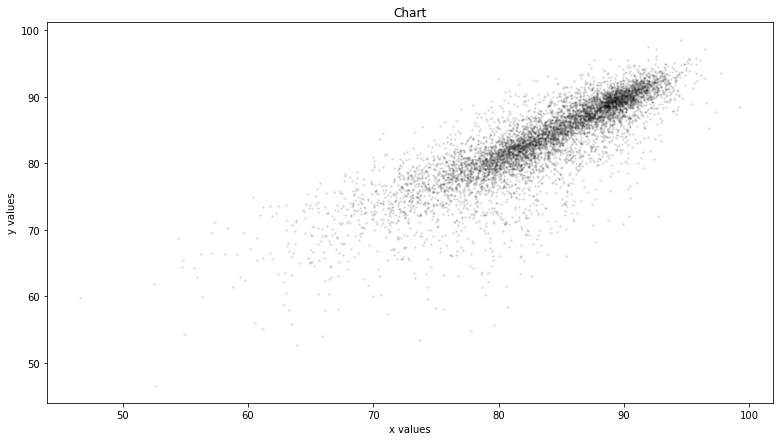

In [13]:
shift = 1
plt.figure(figsize=(13,7))
jscatter(temps[:-shift], temps[shift:])

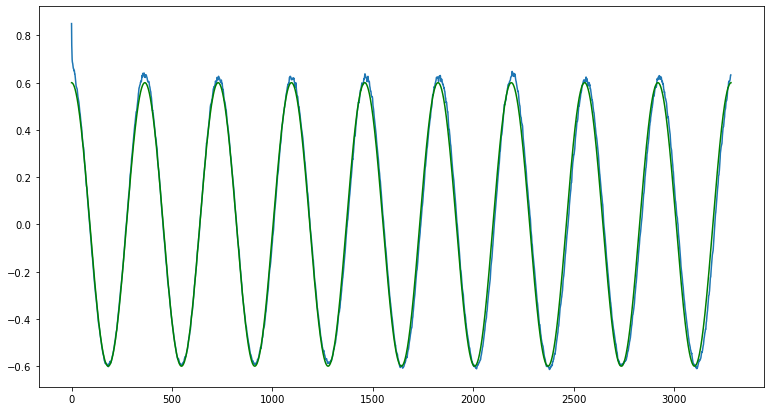

In [14]:
n_days = 365*9
autocorr = []
for shift in range(1,n_days):
    cv = np.corrcoef(temps[:-shift], temps[shift:])[0][1]
    autocorr.append(cv)
    
plt.figure(figsize=(13,7))
plt.plot(autocorr)
# Add a sinusoidal approximation curve
d = np.arange(n_days)
fit = .6 * np.cos(2 * np.pi * d / 365)
plt.plot(d, fit, color="green")
plt.show()

Autocorrelation patterns for temperature shows a strongly annual \
trend, which can be subracted away to quantify what is left, however, \
to catch this pattern in a more general way we could calculate the \
median temperature for every datapoints around some range around the days \
for every year that theese day of the year have records. For example the median for \
Juli 15 can be calculated from all datapoints from Juli 10 to Juli 20 that \
exist in the dataset, and in 'temps' portion of this dataset there is 19 years of \
such data which gives 10*19 = 190 datapoints for each estimation to be made.

In [15]:
def find_day_of_year(year, month, day):
    """
    Convert year, month, date to day of the year
    Januari 1 = 0

    Parameters
    -----------
    year: int
    month: int
    day: int

    Returns
    -------
    day_of_year: int
    """
    days_each_month = np.array([
        31,  # January [0]
        28,  # February [1]
        31,  # Mars [2]
        30,  # April [3]
        31,  # May [4]
        30,  # June [5]
        31,  # July [6]
        31,  # August [7]
        30,  # September [8]
        31,  # October [9]
        30,  # November [10]
        31   # December [11]
    ])
    # For leap years
    if year%4 == 0:
        days_each_month[1] += 1
    
    months_days_passed = np.array(days_each_month[:(month-1)])
    total_days_passed = sum(months_days_passed) + day
    day_of_year = total_days_passed - 1
    return day_of_year

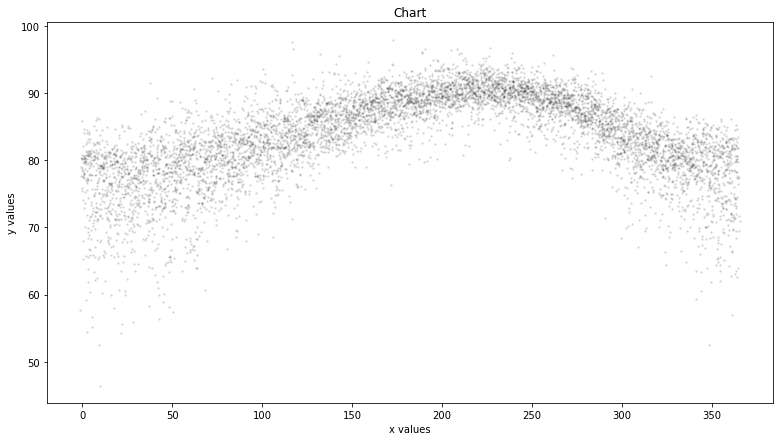

In [16]:
day_of_year = np.zeros(temps.size)
for i_row in range(temps.size):
    day_of_year[i_row] = find_day_of_year(year[i_row],
                                          month[i_row],
                                          day[i_row])

plt.figure(figsize=(13,7))
jscatter(day_of_year, temps)

In [17]:
## Create 10-day medians for each day of the year
median_temp_calendar = np.zeros(366)
ten_day_medians = np.zeros(temps.size)
for i_day in range(0, 365):
    lower_bound_day = i_day - 5
    higher_bound_day = i_day + 5
    if lower_bound_day < 0:
        lower_bound_day += 365
    if higher_bound_day > 365:
        higher_bound_day += -365
    if lower_bound_day < higher_bound_day:
        i_window_days = np.where(
            np.logical_and(day_of_year >= lower_bound_day,
            day_of_year <= higher_bound_day))
    else:
        i_window_days = np.where(
            np.logical_or(day_of_year >=lower_bound_day,
                      day_of_year <= higher_bound_day))

    ten_day_median = np.median(temps[i_window_days])
    median_temp_calendar[i_day] = ten_day_median
    ten_day_medians[np.where(day_of_year == i_day)] = ten_day_median

    if i_day == 364:
        ten_day_medians[np.where(day_of_year == 365)] = ten_day_median
        median_temp_calendar[365] = ten_day_median

print(ten_day_medians.size, np.unique(ten_day_medians), ten_day_medians)

7104 [77.  78.  78.5 79.  80.  81.  81.5 82.  83.  84.  85.  86.  87.  88.
 88.5 89.  90.  90.5 91. ] [90. 91. 91. ... 79. 79. 79.]


####  Gaps to be filled
  1.  Calculate 'day_of_year' for each temp [x]
  2.  Handle beginning and end of year      [x]
  3.  Handle leap year              [x]

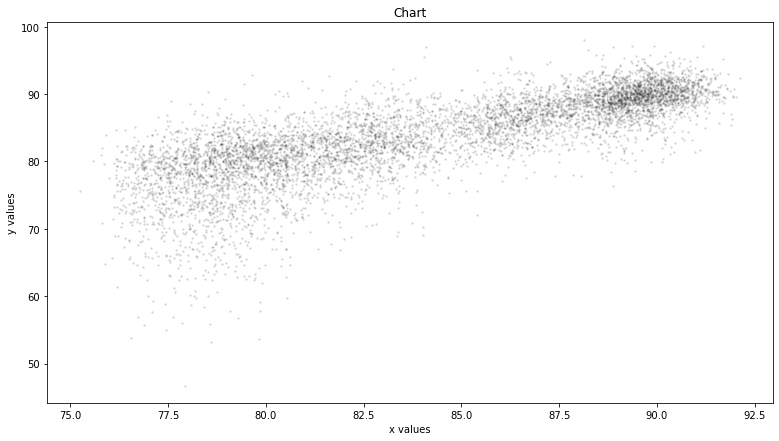

In [18]:
plt.figure(figsize=(13,7))
jscatter(ten_day_medians,temps)

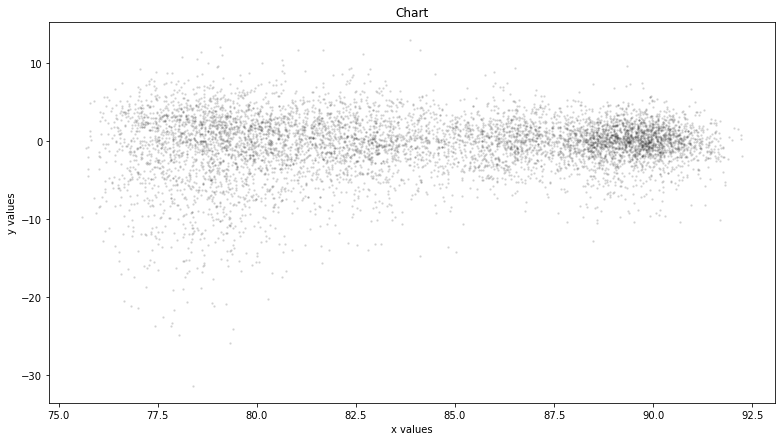

In [19]:
plt.figure(figsize=(13,7))
jscatter(ten_day_medians, temps - ten_day_medians)

In [20]:
print(temps[np.where(temps<50)],
      day_of_year[np.where(temps<50)],
      np.where(temps<50)[0] / 365.25 )

[47.] [10.] [11.46885695]


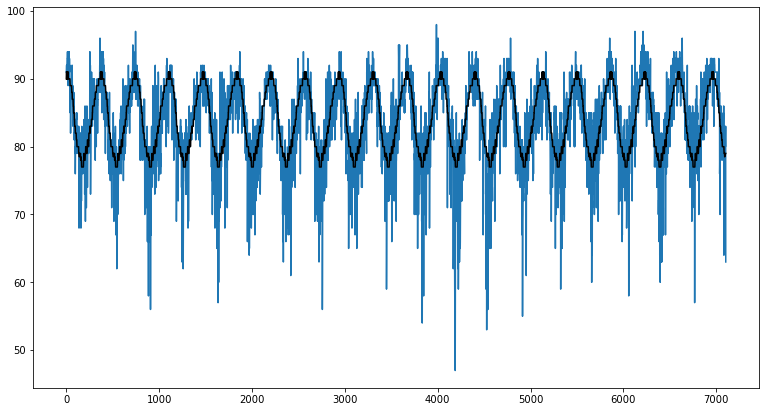

In [21]:
plt.figure(figsize=(13,7))
plt.plot(temps)
plt.plot(ten_day_medians, color='black')
plt.show()

In [22]:
def predict(year, month, day, temperature_calendar):
    """
    For a given day, month, and year, predict the 
    high temperature for Fort Lauderdale Beach.

    Parameters
    ----------
    year, month, day: int
    The date of interest
    temperature_calendar: arraf of floats
    The typical temperature for each day of the year.
    Jan 1 = 0, etc.
    
    Returns
    -------
    prediction: float
    """
    i_day = find_day_of_year(year,month,day)
    prediction = temperature_calendar[i_day]
    return prediction

In [23]:
if __name__ == '__main__':
    for test_day in range(1,30):
        test_year = 2016
        test_month = 6
        prediction = predict(test_year, test_month, test_day, median_temp_calendar)
        print(test_year, test_month, test_day, prediction)

2016 6 1 87.0
2016 6 2 87.0
2016 6 3 87.0
2016 6 4 87.0
2016 6 5 87.0
2016 6 6 87.0
2016 6 7 88.0
2016 6 8 88.0
2016 6 9 88.0
2016 6 10 88.0
2016 6 11 88.0
2016 6 12 88.0
2016 6 13 88.0
2016 6 14 88.0
2016 6 15 88.0
2016 6 16 88.0
2016 6 17 88.0
2016 6 18 89.0
2016 6 19 89.0
2016 6 20 89.0
2016 6 21 89.0
2016 6 22 89.0
2016 6 23 89.0
2016 6 24 89.0
2016 6 25 89.0
2016 6 26 89.0
2016 6 27 89.0
2016 6 28 89.0
2016 6 29 89.0
